## Importing Libraries

In [533]:

import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import SimpleRNN
import missingno as msno
import plotly.express as px
from sklearn.ensemble import RandomForestClassifier
from lightgbm.sklearn import LGBMClassifier
import plotly as pio
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import hamming_loss

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


## Reading Data

In [534]:
data = pd.read_csv('/content/fraud_detection.csv')

### data info

In [535]:
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
3749586,279,CASH_OUT,226716.59,C482321322,0.0,0.00,C30694688,867785.58,1094502.17,0.0,0.0
3749587,279,CASH_OUT,11672.36,C891215384,0.0,0.00,C393125134,271237.28,282909.64,0.0,0.0
3749588,279,CASH_OUT,232921.92,C139798161,0.0,0.00,C632504280,379446.17,612368.10,0.0,0.0
3749589,279,CASH_OUT,60093.54,C1397600788,0.0,0.00,C68587257,259402.33,319495.87,0.0,0.0


In [536]:
data.info()
print("-----------------SHAPE-----------------")
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3749591 entries, 0 to 3749590
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         float64
 10  isFlaggedFraud  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 314.7+ MB
-----------------SHAPE-----------------


(3749591, 11)

## Data Cleaning

### Checking for missing values

<Axes: >

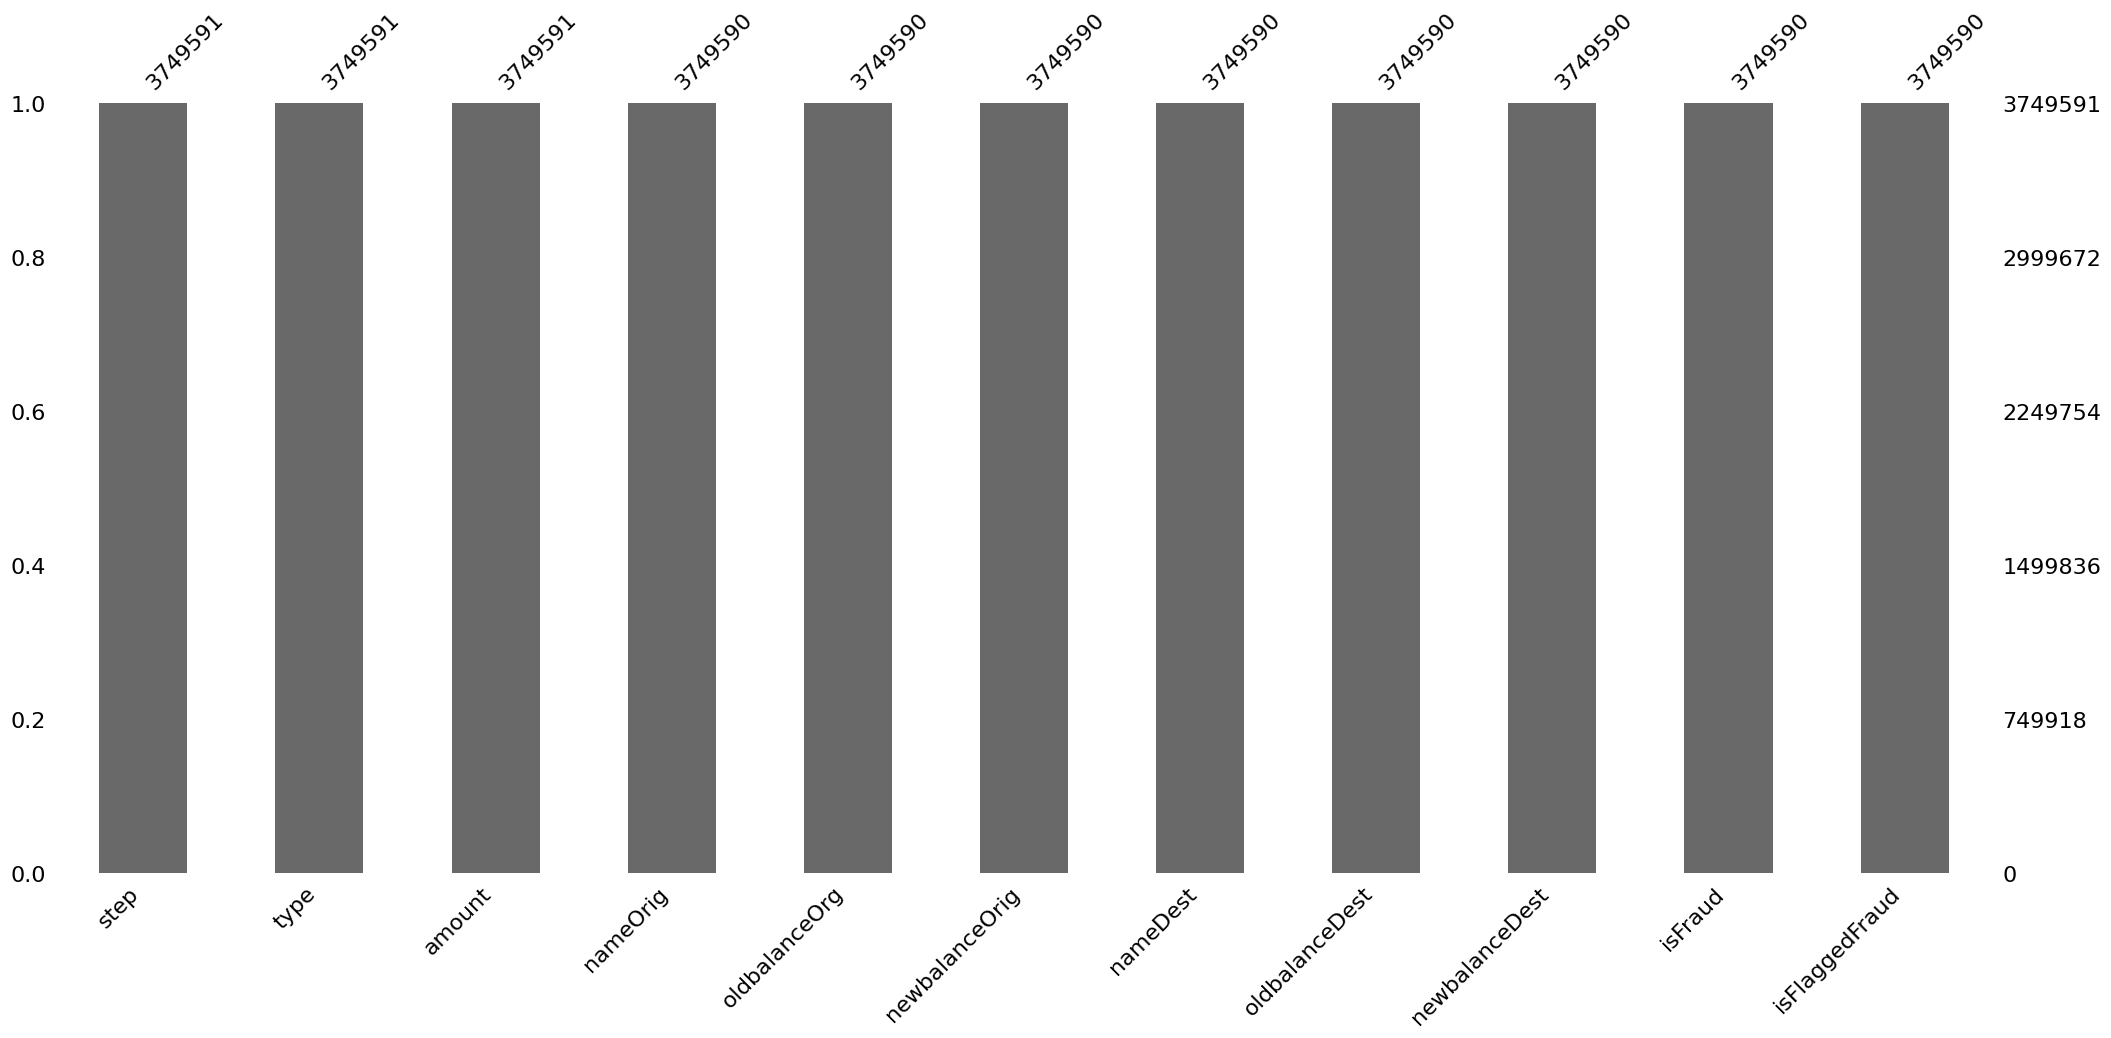

In [537]:
msno.bar(data)

#### All columns show 100% completed data records!

### Number of duplicates in data

In [538]:
duplicate_count = len(data[data.duplicated()])
duplicate_count

0

### Renaming columns

In [539]:
new_column_names = {
    'nameOrig': 'origin',
    'oldbalanceOrg': 'sender_old_bal',
    'newbalanceOrig': 'sender_new_bal',
    'nameDest': 'dest',
    'oldbalanceDest': 'dest_old_bal',
    'newbalanceDest': 'dest_new_bal'
}

data.rename(columns=new_column_names, inplace=True)


In [540]:
data

,step,type,amount,origin,sender_old_bal,sender_new_bal,dest,dest_old_bal,dest_new_bal,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
3749586,279,CASH_OUT,226716.59,C482321322,0.0,0.00,C30694688,867785.58,1094502.17,0.0,0.0
3749587,279,CASH_OUT,11672.36,C891215384,0.0,0.00,C393125134,271237.28,282909.64,0.0,0.0
3749588,279,CASH_OUT,232921.92,C139798161,0.0,0.00,C632504280,379446.17,612368.10,0.0,0.0
3749589,279,CASH_OUT,60093.54,C1397600788,0.0,0.00,C68587257,259402.33,319495.87,0.0,0.0


### Removing non-essential columns

In [541]:
columns_to_drop = ['step', 'isFlaggedFraud']
data.drop(columns=columns_to_drop, inplace=True)


In [542]:
data

,type,amount,origin,sender_old_bal,sender_new_bal,dest,dest_old_bal,dest_new_bal,isFraud
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...
3749586,CASH_OUT,226716.59,C482321322,0.0,0.00,C30694688,867785.58,1094502.17,0.0
3749587,CASH_OUT,11672.36,C891215384,0.0,0.00,C393125134,271237.28,282909.64,0.0
3749588,CASH_OUT,232921.92,C139798161,0.0,0.00,C632504280,379446.17,612368.10,0.0
3749589,CASH_OUT,60093.54,C1397600788,0.0,0.00,C68587257,259402.33,319495.87,0.0


## Data Analysis

### Visualizing fraud occurances

In [543]:
def plot_fraud_by_transaction_type(data):
    plt.figure(figsize=(15, 8))
    g = sns.countplot(data=data, x='type', hue='isFraud', palette='dark', alpha=0.6)
    plt.title("Checking for fraud occurrences for each Transaction types")

    # Finding counts and annotating
    annotate_counts(g)

In [544]:
def annotate_counts(ax):
    for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x() + 0.04, p.get_height() + 10000))


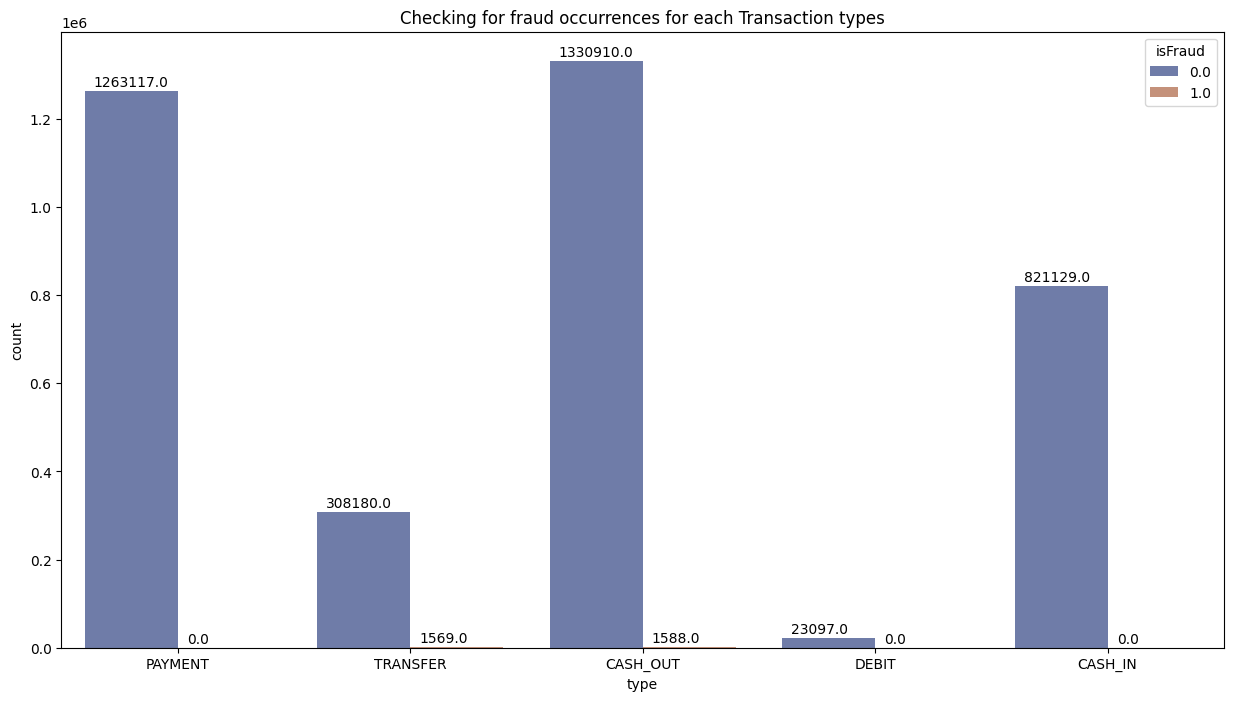

In [545]:
plot_fraud_by_transaction_type(data)
plt.show()

### Accounts involved in fraud transactions

#### Checking origin accounts (and if same account has been used for multiple fraudulent transactions)

##### For type 'Transfer'

In [546]:
transfer_fraud = data[(data['type'] == 'TRANSFER') & (data['isFraud'] == 1)]
transfer_fraud_counts = data[(data['type'] == 'TRANSFER') & (data['isFraud'] == 1)]['origin'].value_counts()

In [547]:
transfer_fraud_counts

C1305486145    1
C1644806560    1
C1089670756    1
C1132083905    1
C71755087      1
              ..
C1864352304    1
C1872678613    1
C702109004     1
C759761137     1
C1819955276    1
Name: origin, Length: 1569, dtype: int64

##### For type 'CashOut'

In [548]:
cashOut_fraud = data[(data['type']=='CASH_OUT') & (data['isFraud']==1)]
cashOut_fraud_count = data[(data['type']=='CASH_OUT') & (data['isFraud']==1)]['origin'].value_counts()

cashOut_fraud_count

C840083671     1
C1705629934    1
C1581439980    1
C721676184     1
C1217101602    1
              ..
C849209216     1
C538142346     1
C337026029     1
C1227042704    1
C1955555137    1
Name: origin, Length: 1588, dtype: int64

#### Checking destination accounts (and if same account has been used for multiple fraudulent transactions)

##### For type 'Transfer'

In [549]:
transfer_fraud['dest'].value_counts()

C553264065     1
C1111727092    1
C747932688     1
C955198432     1
C1714094966    1
              ..
C238575749     1
C1669827303    1
C1385287774    1
C1046167270    1
C1376329806    1
Name: dest, Length: 1569, dtype: int64

##### For type 'CashOut'

In [550]:
cashOut_fraud['dest'].value_counts()

C644163395     2
C1013511446    2
C2129197098    2
C1981613973    2
C185805228     2
              ..
C121215038     1
C950019767     1
C1743229382    1
C976082192     1
C1535626226    1
Name: dest, Length: 1580, dtype: int64

### Checking if transfer destination account used for cashing out (for fraud cases)

In [551]:
is_dest_in_cashout_origin = transfer_fraud['dest'].isin(cashOut_fraud['origin']).any()
trans_cashout = data[data['type'] == 'TRANSFER']
is_dest_in_trans_cashout_origin = transfer_fraud['dest'].isin(trans_cashout['origin']).any()
count_dest_in_trans_cashout_origin = transfer_fraud['dest'].isin(trans_cashout['origin']).sum()
print(f"Is destination in cashOut origin? {is_dest_in_cashout_origin}")
print(f"Is destination in trans_cashout origin? {is_dest_in_trans_cashout_origin}")
print(f"Count of destinations in trans_cashout origin: {transfer_fraud.dest.isin(trans_cashout.origin).count()}")

Is destination in cashOut origin? False
Is destination in trans_cashout origin? False
Count of destinations in trans_cashout origin: 1569


### Insights

<ul>
    <li>Fraud Transactions are seen only for 'TRANSFER' (4097 occurances) and 'CASH_OUT' (4116 occurances) types</li>
    <li>Fraud tranasactions are usually to and from customers</li>
    <li>Recipient accounts fraud 'TRANSFER' cases were -</li>
    <ul>
        <li>not involved in any fraudulent cash withdrawals</li>
        <li>4097 times used to make valid cash withdrawals</li>
    </ul>
</ul>

## Feature Engineering

### Creating new column client_type having 4 categories and dropping 'origin' and 'dest'

<ul>
    <li>CC - Customer to Customer</li>
    <li>CM - Customer to Merchant</li>
    <li>MC - Merchant to Customer</li>
    <li>MM - Merchant to Merchant</li>
</ul>

#### Adding 'client_type' column

In [552]:
conditions = [
    (data['origin'].str.contains('C')) & (data['dest'].str.contains('C')),
    (data['origin'].str.contains('C')) & (data['dest'].str.contains('M')),
    (data['origin'].str.contains('M')) & (data['dest'].str.contains('C')),
    (data['origin'].str.contains('M')) & (data['dest'].str.contains('M'))
]

choices = ['CC', 'CM', 'MC', 'MM']

data['client_type'] = np.select(conditions, choices, default=np.nan)

#### Dropping 'origin' and 'dest'

In [553]:
data.drop(columns = ['origin', 'dest'], axis = 'columns', inplace = True)

In [554]:
data

,type,amount,sender_old_bal,sender_new_bal,dest_old_bal,dest_new_bal,isFraud,client_type
0,PAYMENT,9839.64,170136.0,160296.36,0.00,0.00,0.0,CM
1,PAYMENT,1864.28,21249.0,19384.72,0.00,0.00,0.0,CM
2,TRANSFER,181.00,181.0,0.00,0.00,0.00,1.0,CC
3,CASH_OUT,181.00,181.0,0.00,21182.00,0.00,1.0,CC
4,PAYMENT,11668.14,41554.0,29885.86,0.00,0.00,0.0,CM
...,...,...,...,...,...,...,...,...
3749586,CASH_OUT,226716.59,0.0,0.00,867785.58,1094502.17,0.0,CC
3749587,CASH_OUT,11672.36,0.0,0.00,271237.28,282909.64,0.0,CC
3749588,CASH_OUT,232921.92,0.0,0.00,379446.17,612368.10,0.0,CC
3749589,CASH_OUT,60093.54,0.0,0.00,259402.33,319495.87,0.0,CC


## Data Visualization

### Obtaining number of fraud transactions and valid transactions of each 'client_type'

In [555]:
def filter_fraud_valid_transactions(data):
    fraudTrans = data[data['isFraud'] == 1]
    validTrans = data[data['isFraud'] == 0]
    return fraudTrans, validTrans



In [556]:
def count_client_types(data):
    fr = data['client_type'].value_counts()
    return fr


In [557]:
fraudTrans, validTrans = filter_fraud_valid_transactions(data)
print("Fraudulent Transactions by Client Type:")
fr = count_client_types(fraudTrans)
print(fr)

print("\nValid Transactions by Client Type:")
va = count_client_types(validTrans)
print(va)


Fraudulent Transactions by Client Type:
CC    3157
Name: client_type, dtype: int64

Valid Transactions by Client Type:
CC    2483316
CM    1263117
Name: client_type, dtype: int64


### Visualizing the fraud and valid transaction counts for each 'client_type'

In [558]:
def create_subplots():
    plt.figure(figsize=(15, 8))

    # Create the first subplot for Fraud Transactions
    plt.subplot(1, 2, 1)
    plt.title('Fraud Transactions')
    return plt.gca()

def plot_countplot(data, ax, title):
    sns.countplot(x=data, ax=ax)
    ax.set_title(title)


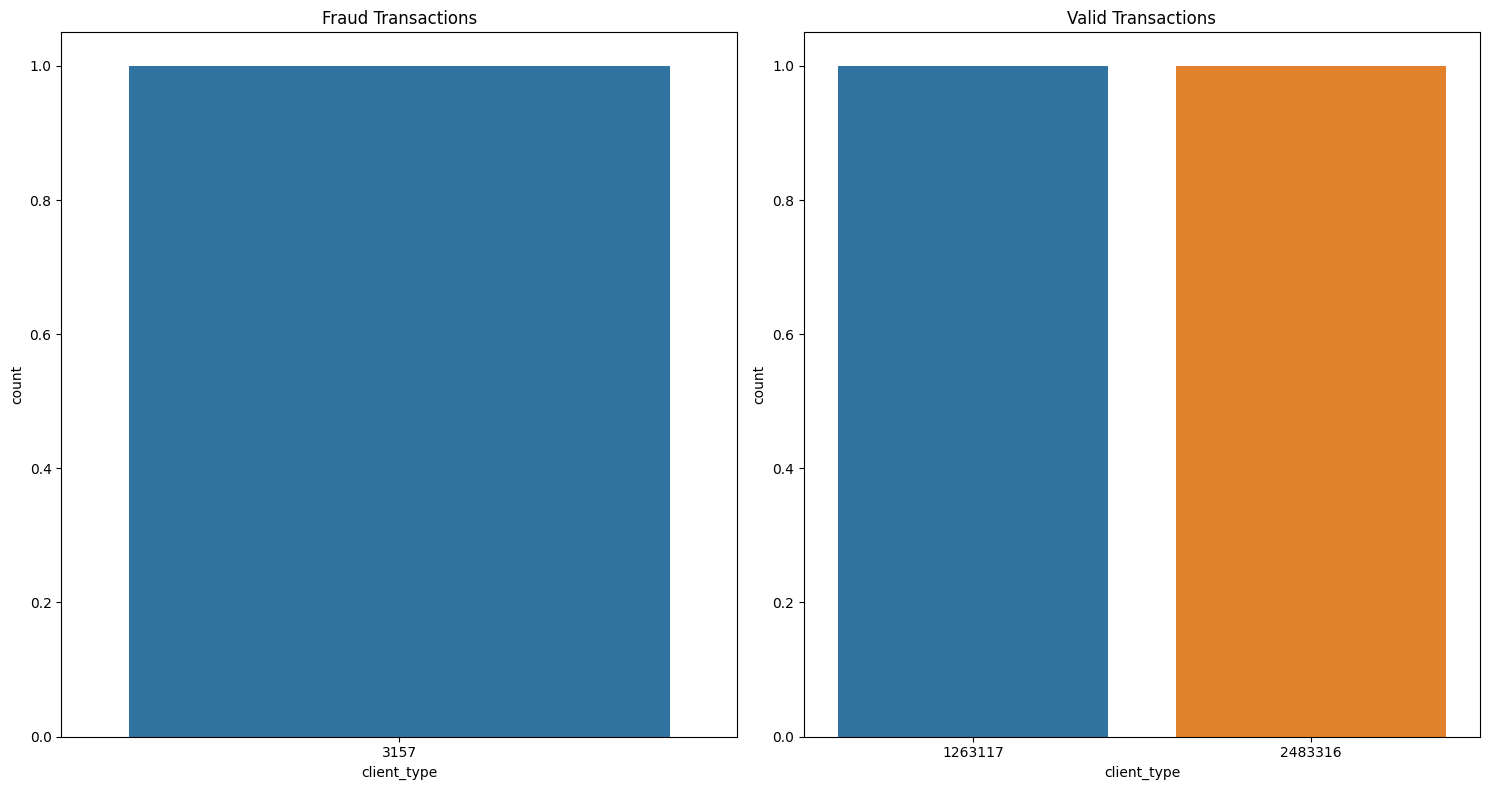

In [559]:
ax1 = create_subplots()
plot_countplot(fr, ax1, 'Fraud Transactions')

ax2 = plt.subplot(1, 2, 2)
plot_countplot(va, ax2, 'Valid Transactions')

plt.tight_layout()
plt.show()


### Visualization of transaction counts categorized by their 'type'

In [560]:
def create_count_plot(data):
    plt.figure(figsize=(15, 8))
    g = sns.countplot(data=data, x='type', palette='dark', alpha=0.6)
    plt.title("Counts for each Transaction types")
    return g

def annotate_counts(ax):
    for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x() + 0.24, p.get_height() + 10000))



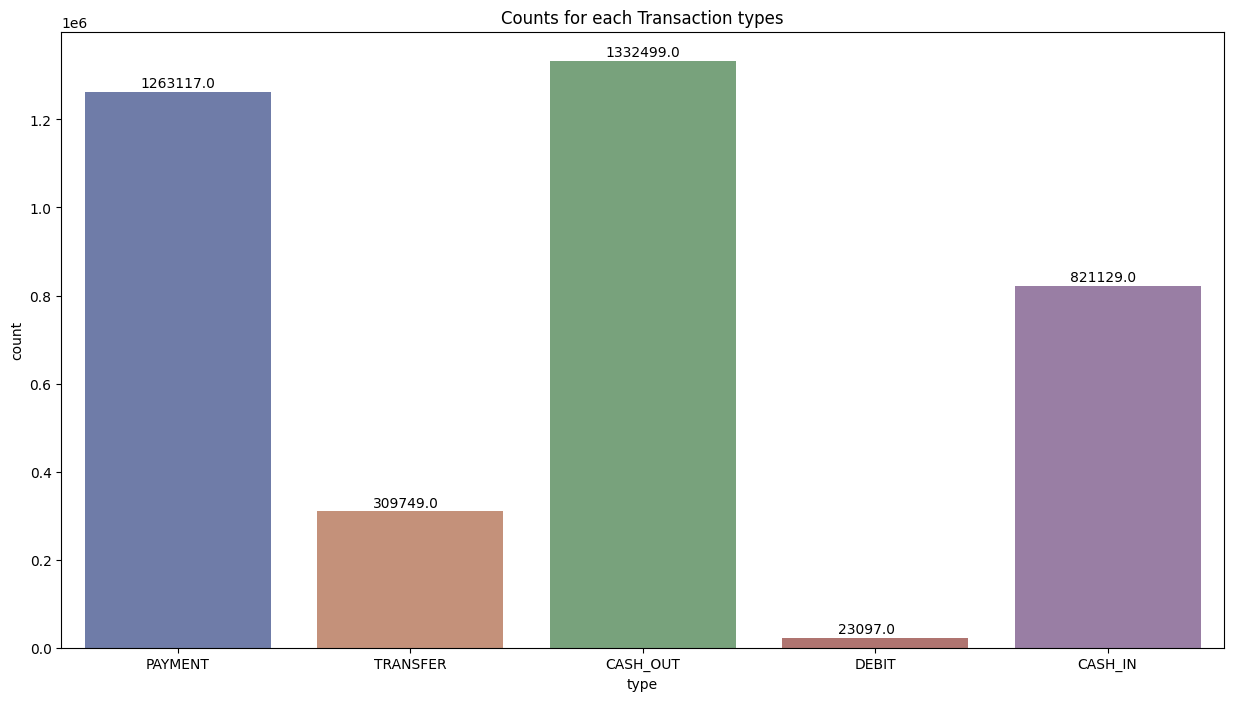

In [561]:
count_plot = create_count_plot(data)
annotate_counts(count_plot)
plt.show()


### Visualization of transaction counts categorized by their 'client_type'

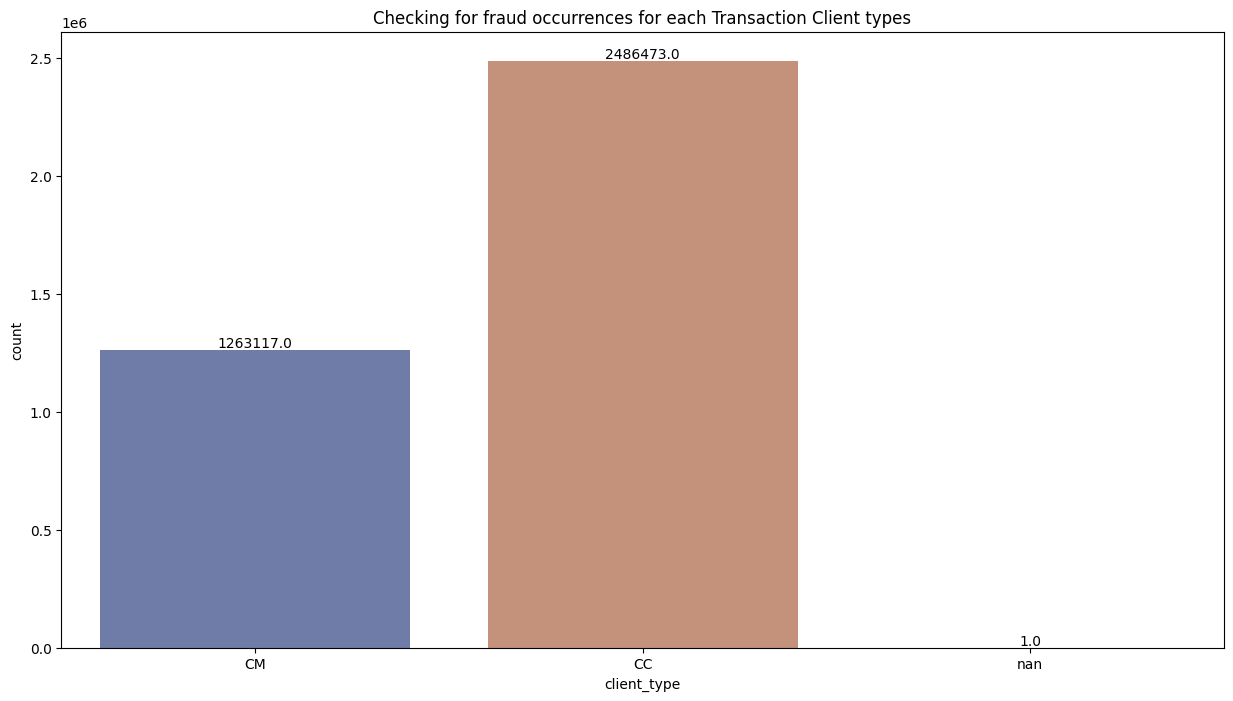

In [562]:
def plot_countplot_with_annotations(data, x_column, title):
    plt.figure(figsize=(15, 8))
    g = sns.countplot(data=data, x=x_column, palette='dark', alpha=0.6)
    plt.title(title)

    # Finding counts and annotating
    for p in g.patches:
        height = p.get_height()
        width = p.get_width()
        x, y = p.get_x(), height + 10000
        plt.annotate(f'{height}', (x + width/2, y), ha='center')

    plt.show()

# Usage example
plot_countplot_with_annotations(data, 'client_type', "Checking for fraud occurrences for each Transaction Client types")


### Visualization of Fraud vs Valid transaction counts categorized by their 'client_type'

In [563]:
def create_count_plot(data):
    plt.figure(figsize=(15, 8))
    g = sns.countplot(data=data, x='client_type', hue='isFraud', palette='dark', alpha=0.6)
    return g

def annotate_counts(ax):
    for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x() + 0.13, p.get_height() + 10000))

def set_plot_title(ax, title):
    ax.set_title(title)


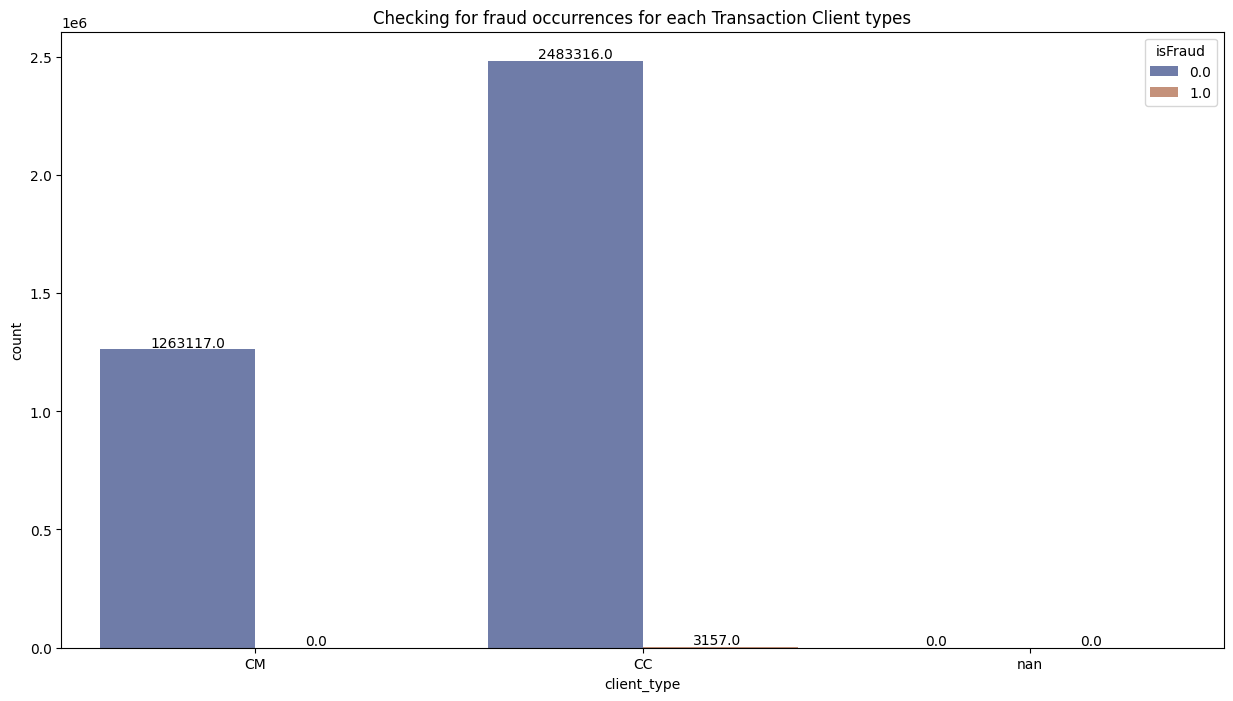

In [564]:
count_plot = create_count_plot(data)
annotate_counts(count_plot)
set_plot_title(count_plot, "Checking for fraud occurrences for each Transaction Client types")
plt.show()


## Data Preprocessing

### Importing necessary libraries

### Obtaining one-hot encodings for 'type' column

In [565]:
def one_hot_encode_and_join(data, column_name, prefix):
    one_hot = pd.get_dummies(data[column_name], prefix=prefix)
    data = data.drop(column_name, axis=1)
    return data.join(one_hot)

In [566]:
data = one_hot_encode_and_join(data, 'type', 'type')
data = one_hot_encode_and_join(data, 'client_type', 'client_type')
print(data.head())


     amount  sender_old_bal  sender_new_bal  dest_old_bal  dest_new_bal  \
0   9839.64        170136.0       160296.36           0.0           0.0   
1   1864.28         21249.0        19384.72           0.0           0.0   
2    181.00           181.0            0.00           0.0           0.0   
3    181.00           181.0            0.00       21182.0           0.0   
4  11668.14         41554.0        29885.86           0.0           0.0   

   isFraud  type_CASH_IN  type_CASH_OUT  type_DEBIT  type_PAYMENT  \
0      0.0             0              0           0             1   
1      0.0             0              0           0             1   
2      1.0             0              0           0             0   
3      1.0             0              1           0             0   
4      0.0             0              0           0             1   

   type_TRANSFER  client_type_CC  client_type_CM  client_type_nan  
0              0               0               1                0 

In [567]:
y = data['isFraud'].fillna(0)
X = data.drop('isFraud', axis=1).fillna(0)

print("X:")
print(X)
print("Y:")
print(y)

X:
            amount  sender_old_bal  sender_new_bal  dest_old_bal  \
0          9839.64        170136.0       160296.36          0.00   
1          1864.28         21249.0        19384.72          0.00   
2           181.00           181.0            0.00          0.00   
3           181.00           181.0            0.00      21182.00   
4         11668.14         41554.0        29885.86          0.00   
...            ...             ...             ...           ...   
3749586  226716.59             0.0            0.00     867785.58   
3749587   11672.36             0.0            0.00     271237.28   
3749588  232921.92             0.0            0.00     379446.17   
3749589   60093.54             0.0            0.00     259402.33   
3749590  248917.54             0.0            0.00          0.00   

         dest_new_bal  type_CASH_IN  type_CASH_OUT  type_DEBIT  type_PAYMENT  \
0                0.00             0              0           0             1   
1                0.0

In [568]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, stratify=y)

### Normalizing X_train and X-test

In [569]:
sc = StandardScaler()

In [570]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## Machine Learning

### Creating list of ML models

In [571]:
def create_classifiers():
    md = 3
    nj =1
    r = 42
    lr = 0.1
    ne =15

    xgbc = xgb.XGBClassifier(max_depth=md, n_jobs=nj, random_state=r, learning_rate=lr)
    rfc = RandomForestClassifier(n_estimators=ne, n_jobs=nj, random_state=r)
    lgbmc = LGBMClassifier(boosting_type='gbdt', objective='binary', random_state=8888)
    logreg = LogisticRegression(solver='liblinear', random_state=r)

    return [xgbc, rfc, lgbmc, logreg]

def train_classifiers(classifiers, X_train, y_train):
    for clsr in classifiers:
        clsr.fit(X_train, y_train)


In [572]:
clsrs = create_classifiers()
train_classifiers(clsrs, X_train, y_train)


[LightGBM] [Info] Number of positive: 2368, number of negative: 2809825
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.206958 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1296
[LightGBM] [Info] Number of data points in the train set: 2812193, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000842 -> initscore=-7.078832
[LightGBM] [Info] Start training from score -7.078832


### Training ML models

### Obtaining prediction and accuracy (hml and auc) calculations

### Creating accuracy dictionaries

In [573]:
def calculate_predictions_and_scores(clf, X_test, y_test):
    y_pred = clf.predict(X_test)
    y_prob = clf.predict_proba(X_test)[:, -1]
    hml_score = hamming_loss(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_prob)
    return hml_score, auc_score

def calculate_hamming_loss_and_auc(classifiers, X_test, y_test):
    hml_scores = []
    auc_scores = []

    for clf in classifiers:
        hml_score, auc_score = calculate_predictions_and_scores(clf, X_test, y_test)
        hml_scores.append(hml_score)
        auc_scores.append(auc_score)

    return hml_scores, auc_scores

def create_sorted_dicts(keys, values):
    data_dict = {}
    i = 0
    while i < len(keys):
        key = keys[i]
        data_dict[key] = values[i]
        i += 1

    sorted_items = sorted(data_dict.items(), key=lambda item: item[1])
    sorted_dict = dict(sorted_items)
    return sorted_dict


In [574]:
hml_list, auc_list = calculate_hamming_loss_and_auc(clsrs, X_test, y_test)

keys = ['XGBoost', 'Random Forest', 'Light GBM', 'LR']

hml_dict_s = create_sorted_dicts(keys, hml_list)
auc_dict_s = create_sorted_dicts(keys, auc_list)

print("Hamming Loss:")
print(hml_dict_s)

print("\nAUC Scores:")
print(auc_dict_s)


Hamming Loss:
{'LR': 0.0005856637202127592, 'XGBoost': 0.0007136776481281163, 'Random Forest': 0.0007531486092353514, 'Light GBM': 0.00091209923639692}

AUC Scores:
{'Light GBM': 0.5975372283213826, 'Random Forest': 0.6937292383078004, 'XGBoost': 0.8959990217710939, 'LR': 0.9792146141370832}


### Plotting AUC accuracy scores (Higher AUC score indicates better result)

In [575]:
import plotly.io as pio
import plotly.express as px
pio.renderers.default = 'colab'

# Assuming you already have 'auc_dict_s' and 'hml_dict_s' available

def plot_bar_chart(data_dict, title):
    fig = px.bar(
        x=list(data_dict.keys()),
        y=list(data_dict.values()),
        text=np.round(list(data_dict.values()), 6),
        title=title,
        color=list(data_dict.keys()),
        color_discrete_sequence=px.colors.sequential.matter
    )
    fig.show()

# Plot AUC scores
plot_bar_chart(auc_dict_s, 'Accuracy (AUC) score of each Classifier')

# Plot Hamming Loss scores
plot_bar_chart(hml_dict_s, 'Accuracy (Hamming Loss) score of each Classifier')

In [576]:
fig = px.bar(x=list(auc_dict_s.keys()), y=list(auc_dict_s.values()), text=np.round(list(auc_dict_s.values()), 6),
            title='Accuracy (AUC) score of each Classifier',color=list(auc_dict_s.keys()),
            color_discrete_sequence=px.colors.sequential.matter)
fig.show()

### Plotting Accuracy (Hamming Loss) scores (Lower score indicates better results)

In [577]:
fig = px.bar(x=list(hml_dict_s.keys()), y=list(hml_dict_s.values()), text=np.round(list(hml_dict_s.values()), 6),
            title='Accuracy (Hamming Loss) score of each Classifier',color=list(hml_dict_s.keys()),
            color_discrete_sequence=px.colors.sequential.matter)
fig.show()

### Insights

<ul>
    <li><b>Logistic Regression</b> has the <b>best</b> performance with the - </li>
    <ul>
        <li>best (highest) AUC score - 0.983745</li>
        <li>best (lowest) Hammington Loss score - 0.000834</li>
    </ul>
    <li><b>Light Gradient-Boosting Machine</b> has <b>worst</b> performance with the - </li>
    <ul>
        <li>worst (lowest) AUC score - 0.493639</li>
        <li>worst (highest) Hamming Loss score - 0.00142</li>
    </ul>

## Neural Network

### Deep Neural Network (DNN)
# Hata deeeeeeeee

#### Importing Libraries

In [578]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#### Creating Network

In [579]:
def create_dnn_model(input_shape, layers):
    dnn = Sequential()
    for layer_units, activation in layers:
        dnn.add(Dense(layer_units, input_shape=input_shape, activation=activation))

    return dnn

def compile_and_train_dnn(model, X_train, y_train, params):
    model.compile(loss=params['loss'], optimizer=params['optimizer'], metrics=params['metrics'])
    history = model.fit(X_train, y_train, epochs=params['epochs'], batch_size=params['batch_size'], verbose=1, validation_split=params['validation_split'])

    return history


In [580]:
input_shape = (X_train.shape[1],)  # Adjust this based on your input shape

dnn_params = {
    'layers': [(16, 'relu'), (32, 'relu'), (8, 'relu'), (1, 'sigmoid')],
    'loss': 'binary_crossentropy',
    'optimizer': 'adam',
    'metrics': ['accuracy'],
    'epochs': 15,
    'batch_size': 250,
    'validation_split': 0.2
}

dnn = create_dnn_model(input_shape, dnn_params['layers'])

print(dnn.summary())

history = compile_and_train_dnn(dnn, X_train, y_train, dnn_params)

print("Training completed.")


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 16)                224       
                                                                 
 dense_17 (Dense)            (None, 32)                544       
                                                                 
 dense_18 (Dense)            (None, 8)                 264       
                                                                 
 dense_19 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1,041
Trainable params: 1,041
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
9000/9000 [==============================] - 25s 3ms/step - loss: 0.0063 - accuracy: 0.9992 - val_loss: 0.0030 - val_accuracy: 0.9994
Epoch 2/15
9000/9000 [============

#### Compile and Train network

#### Finding DNN network predictions and prediction probabilities

In [581]:
def calculate_predictions(model, X_test, threshold=0.5):
    y_prob = model.predict(X_test)
    y_pred = [1 if y_p >= threshold else 0 for y_p in y_prob]
    return y_prob, y_pred

def calculate_auc(y_test, y_prob):
    return roc_auc_score(y_test, y_prob)

def calculate_hamming_loss(y_test, y_pred):
    return hamming_loss(y_test, y_pred)



In [582]:
threshold = 0.5

y_prob, y_pred = calculate_predictions(dnn, X_test, threshold)

dnn_auc = calculate_auc(y_test, y_prob)
print(f"AUC score is: {dnn_auc}")

dnn_hml = calculate_hamming_loss(y_test, y_pred)
print(f"Hamming Loss is: {dnn_hml}")

29294/29294 [==============================] - 39s 1ms/step
AUC score is: 0.9938864279374109
Hamming Loss is: 0.00038617534921132755


#### Calculating accuracy scores (AUC and Hamming Loss)

### Radial Neural Network (RNN)

#### Importing Libraries

In [583]:
from tensorflow.keras.layers import SimpleRNN

#### Reshaping X_train and X_test for use with RNN

In [584]:
rnn_params = {
    'input_shape': (X_train.shape[1],),
    'units': [16, 32],
    'loss': 'binary_crossentropy',
    'optimizer': 'adam',
    'metrics': ['accuracy'],
    'epochs': 15,
    'batch_size': 250,
    'validation_split': 0.2
}

# Reshape the data to include a time step dimension
X_train_rnn = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_rnn = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

print(f"X_train shape is: {X_train_rnn.shape}, X_test shape is: {X_test_rnn.shape}, y_train shape is: {y_train.shape}, y_test shape is: {y_test.shape}")

# Create an RNN model
rnn = Sequential()
rnn.add(SimpleRNN(rnn_params['units'][0], input_shape=(1, X_train.shape[1]), return_sequences=True))
rnn.add(SimpleRNN(rnn_params['units'][1]))
rnn.add(Dense(16, activation='relu'))
rnn.add(Dense(1, activation='sigmoid'))

print(rnn.summary())

# Compile and train the RNN model
rnn.compile(loss=rnn_params['loss'], optimizer=rnn_params['optimizer'], metrics=rnn_params['metrics'])
rnn.fit(X_train_rnn, y_train, epochs=rnn_params['epochs'], batch_size=rnn_params['batch_size'], verbose=1, validation_split=rnn_params['validation_split'])



X_train shape is: (2812193, 1, 13), X_test shape is: (937398, 1, 13), y_train shape is: (2812193,), y_test shape is: (937398,)
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_10 (SimpleRNN)   (None, 1, 16)             480       
                                                                 
 simple_rnn_11 (SimpleRNN)   (None, 32)                1568      
                                                                 
 dense_20 (Dense)            (None, 16)                528       
                                                                 
 dense_21 (Dense)            (None, 1)                 17        
                                                                 
Total params: 2,593
Trainable params: 2,593
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
9000/9000 [==============================

#### Creating Network

#### Compile and Train Network

#### Finding RNN network predictions and prediction probabilities

In [585]:
def calculate_predictions(model, X_test_rnn, threshold=0.5):
    y_prob = model.predict(X_test_rnn)
    y_pred = [1 if y_p >= threshold else 0 for y_p in y_prob]
    return y_prob, y_pred

def calculate_auc(y_test, y_prob):
    return roc_auc_score(y_test, y_prob)

def calculate_hamming_loss(y_test, y_pred):
    return hamming_loss(y_test, y_pred)

In [586]:
threshold = 0.5

y_prob, y_pred = calculate_predictions(rnn, X_test_rnn, threshold)

rnn_auc = calculate_auc(y_test, y_prob)
print(f"AUC score is: {rnn_auc}")

rnn_hml = calculate_hamming_loss(y_test, y_pred)
print(f"Hamming Loss is: {rnn_hml}")


29294/29294 [==============================] - 49s 2ms/step
AUC score is: 0.9944191488530285
Hamming Loss is: 0.00041177813479439896


#### Calculating accuracy scores (AUC and Hamming Loss)

### Comparing Neural Network accuracy scores

In [587]:

keys = ['DNN', 'RNN']
NN_auc_scrs = [dnn_auc, rnn_auc]
NN_hml_scrs = [dnn_hml, rnn_hml]

NN_auc_dict = dict(zip(keys, NN_auc_scrs))
NN_hml_dict = dict(zip(keys, NN_hml_scrs))


print("\nHamming Loss Dictionary:")
print(NN_hml_dict)



Hamming Loss Dictionary:
{'DNN': 0.00038617534921132755, 'RNN': 0.00041177813479439896}


#### Plotting AUC accuracy scores (Higher AUC score indicates better result)

In [588]:
def plot_bar_chart(data_dict, title):
    fig = px.bar(
        x=list(data_dict.keys()),
        y=list(data_dict.values()),
        text=np.round(list(data_dict.values()), 6),
        title=title,
        color=list(data_dict.keys()),
        color_discrete_sequence=px.colors.sequential.matter
    )
    fig.show()

plot_bar_chart(NN_auc_dict, 'Accuracy (AUC) score of each Classifier')
plot_bar_chart(NN_hml_dict, 'Accuracy (Hamming Loss) score of each Classifier')


### Plotting Accuracy (Hamming Loss) scores (Lower score indicates better results)

### Insights

<ul>
    <li><b>RNN</b> performs better than <b>DNN</b> - </li>
    <ul>
        <li>RNN has the better (higher) AUC score </li>
        <li>RNN has the better (lower) Hammington Loss score </li>

## Combining ML and NN results

### AUC score case

In [589]:
auc_comb_dict = auc_dict_s
auc_comb_dict.update(NN_auc_dict)
auc_comb_dict_s = dict(sorted(auc_comb_dict.items(), key=lambda item: item[1]))
auc_comb_dict_s
hml_comb_dict = hml_dict_s
hml_comb_dict.update(NN_hml_dict)
hml_comb_dict_s = dict(sorted(hml_comb_dict.items(), key=lambda item: item[1]))
hml_comb_dict_s

{'DNN': 0.00038617534921132755,
 'RNN': 0.00041177813479439896,
 'LR': 0.0005856637202127592,
 'XGBoost': 0.0007136776481281163,
 'Random Forest': 0.0007531486092353514,
 'Light GBM': 0.00091209923639692}

In [590]:
def combine_and_sort_dicts(dict1, dict2):
    combined_dict = dict1.copy()
    combined_dict.update(dict2)
    sorted_dict = dict(sorted(combined_dict.items(), key=lambda item: item[1]))
    return sorted_dict


In [591]:
auc_comb_dict = combine_and_sort_dicts(auc_dict_s, NN_auc_dict)
hml_comb_dict = combine_and_sort_dicts(hml_dict_s, NN_hml_dict)

print("Combined and Sorted AUC Dictionary:")
print(auc_comb_dict)

print("\nCombined and Sorted Hamming Loss Dictionary:")
print(hml_comb_dict)


Combined and Sorted AUC Dictionary:
{'Light GBM': 0.5975372283213826, 'Random Forest': 0.6937292383078004, 'XGBoost': 0.8959990217710939, 'LR': 0.9792146141370832, 'DNN': 0.9938864279374109, 'RNN': 0.9944191488530285}

Combined and Sorted Hamming Loss Dictionary:
{'DNN': 0.00038617534921132755, 'RNN': 0.00041177813479439896, 'LR': 0.0005856637202127592, 'XGBoost': 0.0007136776481281163, 'Random Forest': 0.0007531486092353514, 'Light GBM': 0.00091209923639692}


### Visualizing combined accuracy score results

#### Plotting AUC accuracy scores (Higher AUC score indicates better result)

In [592]:
import plotly.express as px

def plot_scores(data_dict, title, score_type):
    fig = px.bar(
        x=list(data_dict.keys()),
        y=list(data_dict.values()),
        text=np.round(list(data_dict.values()), 6),
        title=f'Accuracy ({score_type}) score of each Classifier',
        color=list(data_dict.keys()),
        color_discrete_sequence=px.colors.sequential.matter
    )
    fig.show()

# Assuming you have 'auc_comb_dict_s' and 'hml_comb_dict_s' available
plot_scores(auc_comb_dict_s, 'AUC', 'AUC')
plot_scores(hml_comb_dict_s, 'Hamming Loss', 'Hamming Loss')


### Insights

<ul>
    <li>Both Neural Networks have better performances than any of the ML models (as expected)</li>
    <li>Out of the four ML models and two Neural Networks tried, <b>RNN</b> has the best performance</li>
</ul>

## Summary

<ul>
    <li>Fraud transactions only for 'TRANSFER' and 'CASH_OUT' transcation types</li>
    <li>Fraud transactions only to and from customers</li>
    <li>Recipient account for fraud 'TRANSFER' transactions used 4097 times to make valis cash withdrawals</li>
    <li>Four ML models were used for prediction - </li>
    <ul>
        <li>Logistic Regression: AUC - 0.983745, Hammington Loss - 0.000834</li>
        <li>Random Forest: AUC - 0.746883, Hammington Loss - 0.001035</li>
        <li>Extreme Gradient Boost: AUC - 0.91755, Hammington Loss - 0.001152</li>
        <li>Light Gradient-Boosting Machine: AUC - 0.493639, Hammington Loss - 0.00142</li>
        <li><b>Logistic Regression</b> has the best performance and <b>Light Gradient-Boosting Machine</b> the worst
    </ul>
    <li>Two Neural Networks were used for prediction - </li>
    <ul>
        <li>DNN: AUC - 0.995656, Hammington Loss - 0.000538</li>
        <li>RNN: AUC - 0.997087, Hammington Loss - 0.000471</li>
        <li><b>RNN</b> performs better than <b>DNN</b></li>
    </ul>
    <li>Neural Networks perform better than Machine Learning models in general - as expected</li>

## NOTE:

<ul>
    <li><b>AUC score</b> - The higher the AUC score, the better the model's performance at distinguishing between the true and false classes.</li>
    <li><b>Hammington Loss score</b> - Fraction of labels that are predicted incorrectly. So lower the score the better the model/network performance.</li>
</ul>

<ul>
    <li><b>Data obtained from</b> - https://www.kaggle.com/datasets/ealaxi/paysim1</li>
    <li><b>Work heavily inspired by</b> - https://www.kaggle.com/code/waleedfaheem/credit-card-fraud-detection-auc-0-9
    <br>Main differences - </br></li>
    <ul>
        <li>Neural Networks included for prediction purposes</li>
        <li>Minor differences in observations/findings</li>
        <li>Different accuracy metrics used for determining model/network performances</li>
    </ul>
</ul>